In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 200

### Cleaning the Data

In [242]:
new_df = pd.read_csv('Data/file4.csv')
new_df = new_df.drop("Unnamed: 0", axis=1)

<b> Remove irrelevant columns and format column titles

In [243]:
new_df = new_df.drop(["Customer", "Vehicle Type", "Effective To Date", "Months Since Policy Inception", "Income"], axis=1)

In [244]:
new_df.columns = new_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [245]:
new_df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,location_code,marital_status,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.22,No,Basic,College,Employed,M,Suburban,Married,61,7.00,0.00,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize
1,California,2228.53,No,Basic,College,Unemployed,F,Suburban,Single,64,3.00,0.00,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize
2,Washington,14947.92,No,Basic,Bachelor,Employed,M,Suburban,Single,100,34.00,0.00,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize
3,Oregon,22332.44,Yes,Extended,College,Employed,M,Suburban,Single,97,10.00,0.00,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize
4,Oregon,9025.07,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,117,NaN,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.93,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.37,No,Premium,Bachelor,Unemployed,F,Suburban,Married,253,NaN,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.40,Luxury Car,Medsize
10906,Oregon,5259.44,No,Basic,College,Employed,F,Urban,Married,65,7.00,0.00,6,Personal Auto,Personal L3,Offer2,Branch,273.02,Four-Door Car,Medsize
10907,Arizona,23893.30,No,Extended,Bachelor,Employed,F,Rural,Married,201,11.00,0.00,2,Corporate Auto,Corporate L3,Offer1,Web,381.31,Luxury SUV,Medsize
10908,California,11971.98,No,Premium,College,Employed,F,Urban,Divorced,158,0.00,4.00,6,Personal Auto,Personal L1,Offer1,Branch,618.29,SUV,Medsize


<b> Deal with null values

In [246]:
new_df.isna().sum()

state                        631
customer_lifetime_value        0
response                     631
coverage                       0
education                      0
employmentstatus               0
gender                         0
location_code                  0
marital_status                 0
monthly_premium_auto           0
months_since_last_claim      633
number_of_open_complaints    633
number_of_policies             0
policy_type                    0
policy                         0
renew_offer_type               0
sales_channel                  0
total_claim_amount             0
vehicle_class                622
vehicle_size                 622
dtype: int64

In [247]:
new_df["response"] = new_df["response"].fillna("No")

In [248]:
new_df["number_of_open_complaints"] = new_df["number_of_open_complaints"].fillna(0.0)


In [249]:
new_df = new_df.dropna()

In [250]:
new_df.isna().sum()

state                        0
customer_lifetime_value      0
response                     0
coverage                     0
education                    0
employmentstatus             0
gender                       0
location_code                0
marital_status               0
monthly_premium_auto         0
months_since_last_claim      0
number_of_open_complaints    0
number_of_policies           0
policy_type                  0
policy                       0
renew_offer_type             0
sales_channel                0
total_claim_amount           0
vehicle_class                0
vehicle_size                 0
dtype: int64

<b> Remove outliers

<AxesSubplot:>

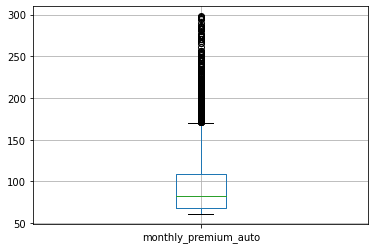

In [251]:
new_df.boxplot(["monthly_premium_auto"])

<AxesSubplot:>

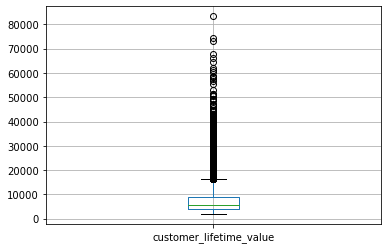

In [252]:
new_df.boxplot(["customer_lifetime_value"])

<AxesSubplot:>

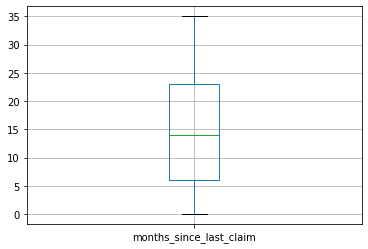

In [253]:
new_df.boxplot(["months_since_last_claim"])

<AxesSubplot:>

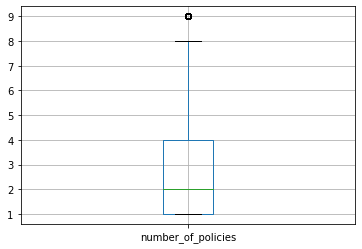

In [254]:
new_df.boxplot(["number_of_policies"])

In [255]:
new_df_n = new_df._get_numeric_data()
new_df_n

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.22,61,7.00,0.00,9,292.80
1,2228.53,64,3.00,0.00,1,744.92
2,14947.92,100,34.00,0.00,2,480.00
3,22332.44,97,10.00,0.00,2,484.01
6,5035.04,63,8.00,3.00,4,287.56
...,...,...,...,...,...,...
10903,2771.66,74,30.00,4.00,1,355.20
10904,19228.46,187,14.00,0.00,2,897.60
10906,5259.44,65,7.00,0.00,6,273.02
10907,23893.30,201,11.00,0.00,2,381.31


In [256]:
new_df_c = new_df.select_dtypes(include=['object'])

In [257]:
stats.zscore(new_df_n)

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.47,-0.94,-0.80,-0.42,2.52,-0.49
1,-0.84,-0.85,-1.20,-0.42,-0.82,1.07
2,1.01,0.20,1.88,-0.42,-0.40,0.16
3,2.09,0.11,-0.51,-0.42,-0.40,0.17
6,-0.43,-0.88,-0.70,2.87,0.43,-0.50
...,...,...,...,...,...,...
10903,-0.76,-0.56,1.48,3.97,-0.82,-0.27
10904,1.63,2.73,-0.11,-0.42,-0.40,1.60
10906,-0.40,-0.82,-0.80,-0.42,1.27,-0.55
10907,2.31,3.13,-0.41,-0.42,-0.40,-0.18


In [258]:
new_df_n = new_df_n[(np.abs(stats.zscore(new_df_n)) < 2).all(axis=1)]
#new_df_n.reset_index(inplace=True)
new_df_n

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,total_claim_amount
1,2228.53,64,3.00,0.00,1,744.92
2,14947.92,100,34.00,0.00,2,480.00
7,4956.25,63,35.00,0.00,3,247.40
8,5989.77,154,33.00,0.00,1,739.20
9,17114.33,85,19.00,0.00,2,408.00
...,...,...,...,...,...,...
10896,19776.57,82,1.00,0.00,2,256.81
10898,5807.66,74,9.00,0.00,7,133.98
10901,4547.89,116,11.00,0.00,1,801.58
10902,3579.02,91,10.00,2.00,1,655.20


In [259]:
new_df = new_df_n.merge(new_df_c,how='left',left_index=True,right_index=True)
new_df

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
1,2228.53,64,3.00,0.00,1,744.92,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,14947.92,100,34.00,0.00,2,480.00,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
7,4956.25,63,35.00,0.00,3,247.40,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
8,5989.77,154,33.00,0.00,1,739.20,California,Yes,Premium,College,Employed,M,Suburban,Single,Personal Auto,Personal L1,Offer2,Branch,Sports Car,Medsize
9,17114.33,85,19.00,0.00,2,408.00,Oregon,No,Extended,Master,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,19776.57,82,1.00,0.00,2,256.81,Oregon,No,Extended,High School or Below,Employed,F,Urban,Divorced,Personal Auto,Personal L2,Offer3,Agent,Four-Door Car,Medsize
10898,5807.66,74,9.00,0.00,7,133.98,California,No,Basic,College,Employed,F,Rural,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize
10901,4547.89,116,11.00,0.00,1,801.58,Washington,No,Premium,Bachelor,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer4,Agent,Two-Door Car,Medsize
10902,3579.02,91,10.00,2.00,1,655.20,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize


<b> Split into dependant and independant variables

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

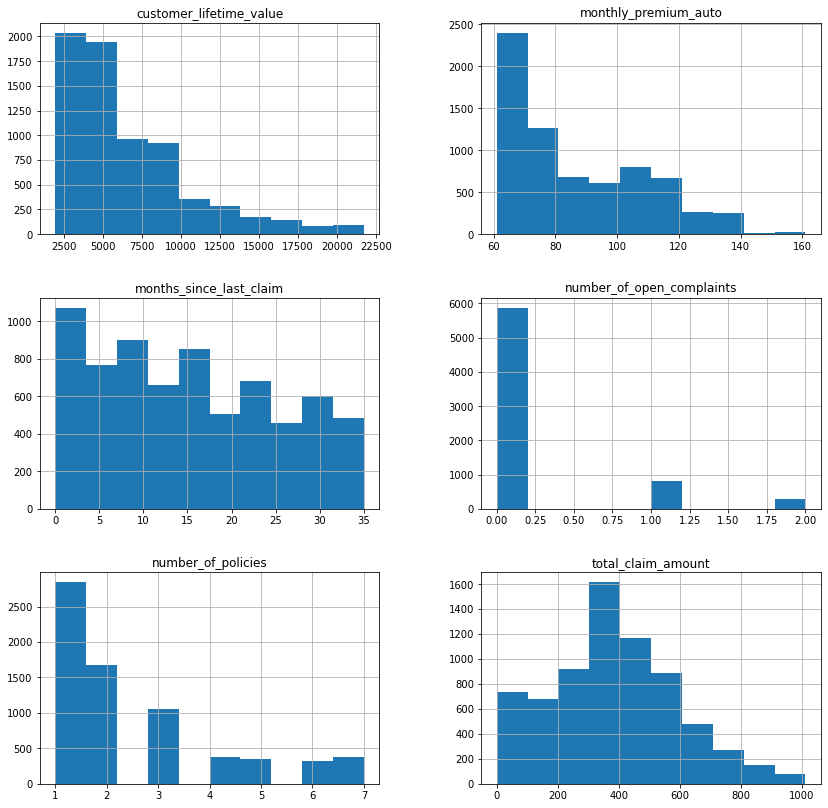

In [260]:
new_df.hist(figsize=(14,14))

In [261]:
X=new_df.drop("total_claim_amount", axis=1)
y=new_df["total_claim_amount"]

In [262]:
X_n = x._get_numeric_data()
X_n

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
1,2228.53,64,3.00,0.00,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,14947.92,100,34.00,0.00,2,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7,4956.25,63,35.00,0.00,3,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
8,5989.77,154,33.00,0.00,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
9,17114.33,85,19.00,0.00,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,19776.57,82,1.00,0.00,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10898,5807.66,74,9.00,0.00,7,1,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
10901,4547.89,116,11.00,0.00,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
10902,3579.02,91,10.00,2.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [263]:
X_scaled = StandardScaler().fit_transform(X_n)
X_scaled

array([[-1.07610579, -1.00713983, -1.19393116, ..., -0.54000466,
         0.65521159, -0.4968663 ],
       [ 2.08883039,  0.62342058,  1.87676301, ..., -0.54000466,
         0.65521159, -0.4968663 ],
       [-0.39737319, -1.05243318,  1.97581766, ...,  1.85183588,
         0.65521159, -0.4968663 ],
       ...,
       [-0.49898312,  1.3481141 , -0.40149395, ...,  1.85183588,
         0.65521159, -0.4968663 ],
       [-0.74006443,  0.21578048, -0.50054861, ..., -0.54000466,
         0.65521159, -0.4968663 ],
       [-0.32192925, -0.96184649, -0.79771256, ..., -0.54000466,
         0.65521159, -0.4968663 ]])

In [264]:
X_c = X.select_dtypes(include=['object'])
X_c = pd.get_dummies(X_c, drop_first=True)
X_c

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
7,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
8,1,0,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
9,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
10898,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
10901,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
10902,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [265]:
X = pd.concat([X_n, X_c], axis=1)
X

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
1,2228.53,64,3.00,0.00,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,14947.92,100,34.00,0.00,2,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7,4956.25,63,35.00,0.00,3,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
8,5989.77,154,33.00,0.00,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
9,17114.33,85,19.00,0.00,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,19776.57,82,1.00,0.00,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10898,5807.66,74,9.00,0.00,7,1,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
10901,4547.89,116,11.00,0.00,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
10902,3579.02,91,10.00,2.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression

In [266]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

<b> Standardise

In [267]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

<b> Model using Statsmodels

In [268]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     459.3
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:52:55   Log-Likelihood:                -33468.
No. Observations:                5588   AIC:                         6.703e+04
Df Residuals:                    5543   BIC:                         6.732e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        384.1445      1.297    296.137      0.0

In [269]:
print(model.rsquared_adj)

0.7830552215480298


<b> Model using Scikit Learn

In [270]:
reg = LinearRegression().fit(X_train_scaled, y_train)

In [271]:
reg.coef_

array([-7.28390376e-01,  9.00534223e+01,  1.23441005e+00, -3.00700113e+00,
        6.56590640e-02,  3.41582413e-02,  4.01204392e-01, -4.38408036e-01,
        1.75093140e+00, -3.87286070e+00,  1.24634841e+00, -1.79725210e+00,
       -1.09366745e+00, -1.33287677e+00,  3.96211383e+00, -1.87232676e+00,
       -8.88704928e-01,  1.51189375e+00,  3.11040713e+00,  2.51678200e+01,
        3.61914236e+00,  1.72407767e+02,  7.89689081e+01, -1.29051428e+00,
        2.04214591e+01,  9.49432033e+11,  6.87614740e+12, -1.67503321e+00,
       -2.02988542e+00, -7.36595078e+11, -9.15938113e+11, -1.04420634e+12,
       -2.90588968e+12, -4.56970277e+12, -4.38629844e+12,  3.43980868e+00,
        2.67628326e+00,  2.93312968e+00,  2.17588929e+00, -5.30882024e-01,
        1.41296221e+00,  7.78976603e-01, -3.25707184e-02, -6.87317644e-01,
        1.88509957e+00,  7.11289798e+00])

In [272]:
reg.intercept_

384.1447704336048

In [273]:
reg.score(X_test_scaled, y_test)

0.7790330780564224

<b> Making Prediction

In [274]:
y_pred = reg.predict(X_test_scaled)
y_pred

array([450.28010008, 409.65729925, 506.00379656, ..., 422.13534627,
       740.1524722 , 231.91854626])

In [275]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
7830,345.60,450.28
4865,558.75,409.66
9731,465.60,506.00
6125,403.20,463.95
6107,328.36,235.50
...,...,...
3922,633.60,577.98
6623,340.80,403.56
6703,331.20,422.14
609,900.62,740.15


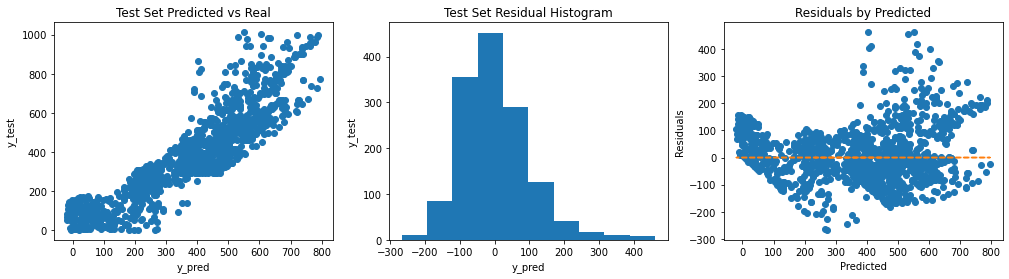

In [276]:
fig, ax = plt.subplots(1,3,figsize=(17,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_pred")
ax[0].set_ylabel("y_test")
ax[0].set_title("Test Set Predicted vs Real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("y_pred")
ax[1].set_ylabel("y_test")
ax[1].set_title("Test Set Residual Histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("Residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

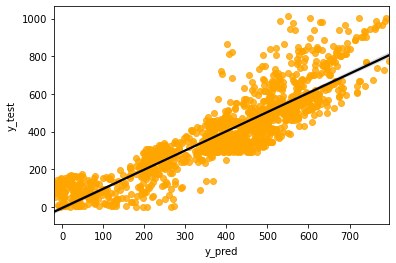

In [277]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "orange"}, line_kws={"color": "black"})

<b> Error Metrics

In [278]:
MSE = mse(y_test, y_pred)
MSE

9755.534492395882

In [279]:
RMSE = mse(y_test, y_pred, squared=False)
RMSE

98.77010930638825

In [280]:
MAE = mae(y_test, y_pred)
MAE

74.79736017687492

In [281]:
R2 = r2_score(y_test, y_pred)
R2

0.7790330780564224

## Model Comparison

Define a function that takes a list of models and trains/tests them

In [282]:
y_pred_train = reg.predict(X_train_scaled)
y_pred_train = pd.Series(y_pred_train)
y_pred_train

0       87.55
1      177.05
2      562.41
3      319.06
4      220.53
        ...  
5583   382.56
5584   437.93
5585   652.47
5586   571.04
5587   154.01
Length: 5588, dtype: float64

In [283]:
y_pred_test = reg.predict(X_test_scaled)
y_pred_test = pd.Series(y_pred_test)
y_pred_test

0      450.28
1      409.66
2      506.00
3      463.95
4      235.50
        ...  
1392   577.98
1393   403.56
1394   422.14
1395   740.15
1396   231.92
Length: 1397, dtype: float64

In [284]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mae(y_train, y_pred_train)
    MAE_test  = mae(y_test, y_pred_test)

    MSE_train = mse(y_train, y_pred_train)
    MSE_test  = mse(y_test, y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train, y_pred_train)
    R2_test  = r2_score(y_test, y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance, df_train, df_test



In [285]:
model_performance(y_train, y_pred_train, y_test, y_pred_test)

(                     Error_metric   Train    Test
 0                      Mean error    1.98   13.67
 1             Mean absolute error   73.96   74.80
 2              Mean squared error 9327.15 9755.53
 3         Root mean squared error   96.58   98.77
 4  Mean absolute percentual error  255.94  146.01
 5                              R2    0.78    0.78,
         Real  Predicted
 0        NaN      87.55
 1     744.92     177.05
 2     480.00     562.41
 3        NaN     319.06
 4        NaN     220.53
 ...      ...        ...
 10895 537.77        NaN
 10898 133.98        NaN
 10901 801.58        NaN
 10902 655.20        NaN
 10906 273.02        NaN
 
 [8348 rows x 2 columns],
         Real  Predicted
 0        NaN     450.28
 1        NaN     409.66
 2        NaN     506.00
 3        NaN     463.95
 4        NaN     235.50
 ...      ...        ...
 10875 350.40        NaN
 10884 217.93        NaN
 10887 528.20        NaN
 10893  81.53        NaN
 10896 256.81        NaN
 
 [2606 rows 

Use the function to check LinearRegressor, Lasso, Ridge and KNeighborsRegressor

### Linear Regression

In [286]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet


In [311]:
model = LinearRegression()

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test,  columns = X.columns)

model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

In [295]:
performance_lm, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
performance_lm

,Error_metric,Train,Test
0,Mean error,-0.00,2.26
1,Mean absolute error,73.96,74.80
2,Mean squared error,9327.15,9755.54
3,Root mean squared error,96.58,98.77
4,Mean absolute percentual error,54.19,125.35
5,R2,0.78,0.78


### Lasso

In [306]:
model = Lasso()

model.fit(X_train, y_train)

y_pred_train_las = model.predict(X_train)
y_pred_test_las  = model.predict(X_test)

In [307]:
performance_las, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
performance_las

,Error_metric,Train,Test
0,Mean error,-0.00,2.26
1,Mean absolute error,73.96,74.80
2,Mean squared error,9327.15,9755.54
3,Root mean squared error,96.58,98.77
4,Mean absolute percentual error,54.19,125.35
5,R2,0.78,0.78


### Ridge

In [308]:
model = Ridge()

model.fit(X_train, y_train)

y_pred_train_rid = model.predict(X_train)
y_pred_test_rid = model.predict(X_test)

In [309]:
performance_rid, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
performance_rid

,Error_metric,Train,Test
0,Mean error,-0.00,2.26
1,Mean absolute error,73.96,74.80
2,Mean squared error,9327.15,9755.54
3,Root mean squared error,96.58,98.77
4,Mean absolute percentual error,54.19,125.35
5,R2,0.78,0.78


### K-NN

In [312]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor() 

neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [313]:
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

,Error_metric,Train,Test
0,Mean error,7.34,8.67
1,Mean absolute error,112.94,143.14
2,Mean squared error,23792.00,37342.42
3,Root mean squared error,154.25,193.24
4,Mean absolute percentual error,148.25,333.98
5,R2,0.45,0.15


Try different values of K to improve result

In [291]:
full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,4.91,12.90
1,2,Mean absolute error,82.47,148.07
2,2,Mean squared error,13328.39,41913.99
3,2,Root mean squared error,115.45,204.73
4,2,Mean absolute percentual error,88.75,370.25
5,2,R2,0.69,0.05
0,3,Mean error,6.23,13.29
1,3,Mean absolute error,97.92,143.16
2,3,Mean squared error,18293.61,39341.64
3,3,Root mean squared error,135.25,198.35


In [298]:
full[full['Error_metric'] == 'R2']


,k,Error_metric,Train,Test
5,2,R2,0.69,0.05
5,3,R2,0.58,0.11
5,4,R2,0.51,0.14
5,5,R2,0.45,0.15
5,6,R2,0.41,0.16
5,7,R2,0.39,0.17
5,8,R2,0.36,0.17
5,9,R2,0.33,0.17
5,10,R2,0.32,0.16
5,11,R2,0.30,0.16


Use feature selection techniques to select subset of features to train the model with (if necessary)

In [314]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 fe

,employmentstatus_Employed,location_code_Suburban,location_code_Urban,sales_channel_Branch,education_High School or Below,employmentstatus_Employed,location_code_Suburban,location_code_Urban
0,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00
4,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...
5583,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
5584,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00
5585,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
5586,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
